In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

# This link shows you how to greyscale a cmap
# https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

In [3]:
# First let's find all of our data
basePath = '/Users/kolbt/Desktop/compiled/whingdingdilly/ipython/epsilon_1_find_diameter/varyParticleFraction'
dataPath = basePath + '/diamTxts'

# Go to the correct parent directory
os.chdir(basePath)
txtFiles = os.listdir(dataPath)
numFiles = len(txtFiles)

In [4]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def varSort(arr):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for alpha
    cpy = np.copy(arr)
    ind = np.arange(0, len(arr))
    for i in xrange(len(cpy)):
        for j in xrange(len(cpy)):
            # Sort by first variable
            if cpy[i] > cpy[j] and i < j:
                # Swap copy array values
                cpy[i], cpy[j] = cpy[j], cpy[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]    
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [5]:
# You want to load the data in so that it's sorted to begin with
os.chdir(dataPath)
xAs = []
for i in xrange(numFiles):
    xAs.append(getFromTxt(txtFiles[i], "_xa", ".txt"))
    xAs[i] /= 100.0
# Now sort the array of txtFile names
indArr = varSort(xAs)
indSort(xAs, indArr)
indSort(txtFiles, indArr)

In [6]:
# Read in the data in pandas dataframes
all_sims = []
os.chdir(dataPath)
for i in xrange(numFiles):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)

In [7]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(numFiles):
    myBool = chkSort(all_sims[i]['Timestep'])
    if myBool is False:
        print("{} is not chronilogically sorted!").format(txtFiles[i])
        exit(1)
    else:
        print("{} sorted... ").format(txtFiles[i])

diam_pa150_pb500_xa0.txt sorted... 
diam_pa150_pb500_xa10.txt sorted... 
diam_pa150_pb500_xa20.txt sorted... 
diam_pa150_pb500_xa30.txt sorted... 
diam_pa150_pb500_xa40.txt sorted... 
diam_pa150_pb500_xa50.txt sorted... 
diam_pa150_pb500_xa60.txt sorted... 
diam_pa150_pb500_xa70.txt sorted... 
diam_pa150_pb500_xa80.txt sorted... 
diam_pa150_pb500_xa90.txt sorted... 
diam_pa150_pb500_xa100.txt sorted... 


In [8]:
display(all_sims[0])

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,...,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,0.0,0,165030,165030,0,34970,34970,0,2437,2437,...,0.8530,0.0,0.0,0.8530,0.51,1392.7,19984.1,1.75,1.75,0.68
1,200000.0,0,147275,147275,0,52725,52725,0,4185,4185,...,0.8410,0.0,0.0,0.8410,0.50,2324.8,29288.6,1.80,1.80,0.63
2,400000.0,0,146491,146491,0,53509,53509,0,4845,4845,...,0.8334,0.0,0.0,0.8334,0.50,2643.0,29189.3,1.83,1.83,0.63
3,600000.0,0,144874,144874,0,55126,55126,0,3990,3990,...,0.8450,0.0,0.0,0.8450,0.51,2237.6,30914.3,1.78,1.78,0.63
4,800000.0,0,139608,139608,0,60392,60392,0,6207,6207,...,0.8273,0.0,0.0,0.8273,0.50,3336.6,32463.5,1.86,1.86,0.61
5,1000000.0,0,119106,119106,0,80894,80894,0,10649,10649,...,0.7541,0.0,0.0,0.7541,0.45,4756.2,36129.7,2.24,2.24,0.53
6,1200000.0,0,96050,96050,0,103950,103950,0,15900,15900,...,0.7418,0.0,0.0,0.7418,0.45,6871.6,44925.0,2.31,2.31,0.44
7,1400000.0,0,72333,72333,0,127667,127667,0,26567,26567,...,0.7377,0.0,0.0,0.7377,0.44,11355.1,54566.8,2.34,2.34,0.35
8,1600000.0,0,53274,53274,0,146726,146726,0,50994,50994,...,0.7321,0.0,0.0,0.7321,0.44,21465.9,61764.3,2.38,2.38,0.27
9,1800000.0,0,42253,42253,0,157747,157747,0,55968,55968,...,0.7384,0.0,0.0,0.7384,0.44,23967.0,67551.4,2.34,2.34,0.22


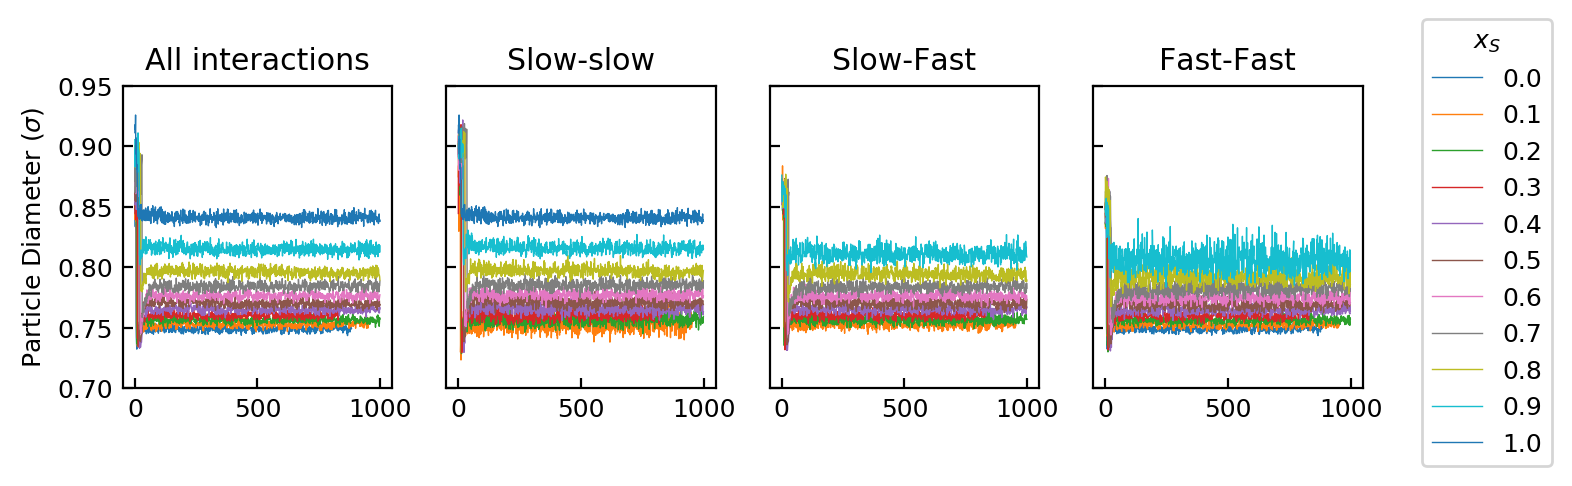

In [9]:
# Make sure I haven't messed up my data


fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

for i in xrange(numFiles):
    all_xs = np.arange(0, len(all_sims[i]['Timestep']))
    ax[0].plot(all_xs, all_sims[i]['sigALL'], label=xAs[i])
    ax[1].plot(all_xs, all_sims[i]['sigAA'], label=xAs[i])
    ax[2].plot(all_xs, all_sims[i]['sigAB'], label=xAs[i])
    ax[3].plot(all_xs, all_sims[i]['sigBB'], label=xAs[i])
ax[0].set_ylim(0.7, 0.95)
ax[0].set_ylabel(r'Particle Diameter $(\sigma)$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$x_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.3))
plt.show()


In [10]:
# Now get time-based steady state values

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
var = pd.DataFrame(columns=headers)
# Initialize dataframes
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)
    var.loc[i] = [0] * len(headers)
    
# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(all_sims[i].iloc[1])):
        # Compute mean of data after steady-state time (25tb) in jth column of ith file
        avg = np.mean(all_sims[i].iloc[-20:-1, j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation and variance in this data
        stdError = np.std(all_sims[i].iloc[-20:-1, j])
        stdErr[headers[j-1]][i] = stdError
        var[headers[j-1]][i] = stdError ** 2

pd.set_option('display.max_rows', 2)
display(SS)
display(stdErr)
display(var)

# Correct the SS dataframe at the extremes
for i in xrange(numFiles):
    if xAs[i] == 0.0:    # Issue with slow particle value
        SS['sigAA'][i] = SS['sigALL'][i]
        SS['sigAB'][i] = SS['sigALL'][i]
    if xAs[i] == 1.0:  # Issue with fast particle value
        SS['sigBB'][i] = SS['sigALL'][i]
        SS['sigAB'][i] = SS['sigALL'][i]

,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,0,21798.7,21798.7,0,178201,178201,0,178201,178201,178201,0.748679,0,0,0.748679,0.45,78452.3,78452.3,2.27105,2.27105,0.116842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,40374.3,0,40374.3,159626,0,159626,72230.9,0,72230.9,39906.1,0.840463,0.840463,0,0,0.502632,40073.1,88559.8,1.80316,1.80316,0.232632


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,0,910.011,910.011,0,910.011,910.011,0,910.011,910.011,910.011,0.00264228,0,0,0.00264228,0,833.755,833.755,0.0155241,0.0155241,0.00566859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,688.746,0,688.746,688.746,0,688.746,440.293,0,440.293,172.178,0.0024579,0.0024579,0,0,0.00440347,325.558,725.926,0.0107863,0.0107863,0.00440347


,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,lg_clustA,tot_clustA,LC_density,DP_density,GP_density
0,0,828121,828121,0,828121,828121,0,828121,828121,828121,6.98166e-06,0,0,6.98166e-06,0,695147,695147,0.000240997,0.000240997,3.2133e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,474371,0,474371,474371,0,474371,193858,0,193858,29645.3,6.04127e-06,6.04127e-06,0,0,1.93906e-05,105988,526969,0.000116343,0.000116343,1.93906e-05


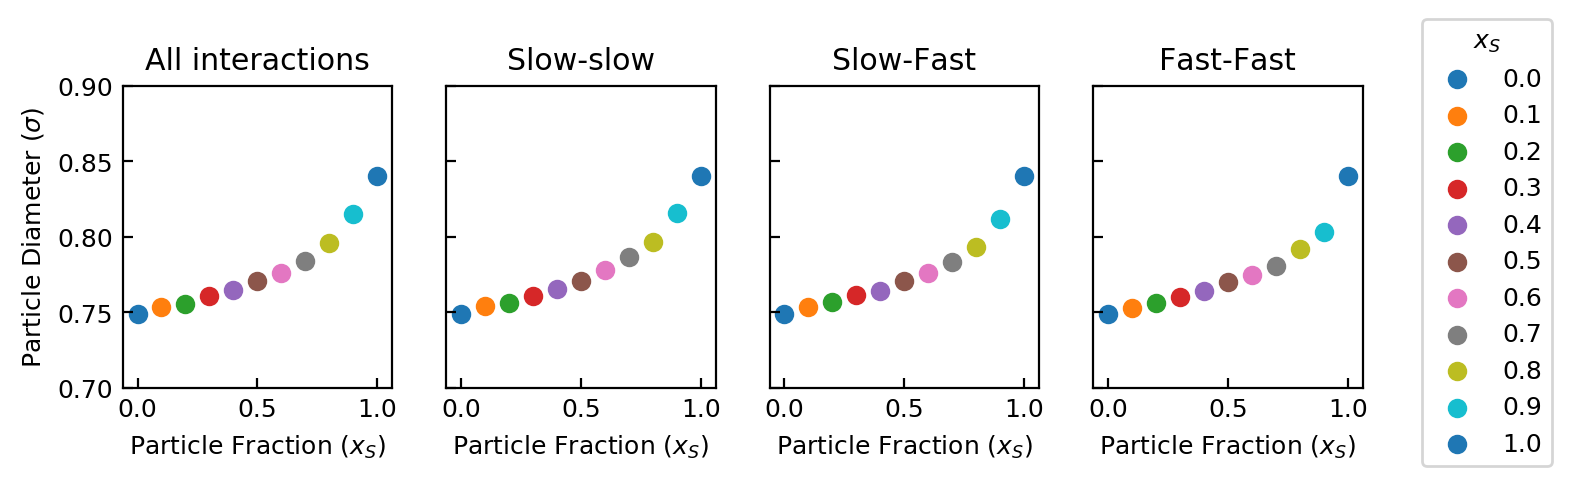

In [11]:
# Now we plot the steady state diameters
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

for i in xrange(numFiles):
    ax[0].scatter(xAs[i], SS['sigALL'][i], label=xAs[i])
    ax[1].scatter(xAs[i], SS['sigAA'][i], label=xAs[i])
    ax[2].scatter(xAs[i], SS['sigAB'][i], label=xAs[i])
    ax[3].scatter(xAs[i], SS['sigBB'][i], label=xAs[i])
ax[0].set_ylim(0.7, 0.9)
ax[1].set_ylim(0.7, 0.9)
ax[2].set_ylim(0.7, 0.9)
ax[3].set_ylim(0.7, 0.9)
ax[0].set_ylabel(r'Particle Diameter $(\sigma)$')
ax[0].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[1].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[2].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[3].set_xlabel(r'Particle Fraction $(x_{S})$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$x_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.3))
plt.show()

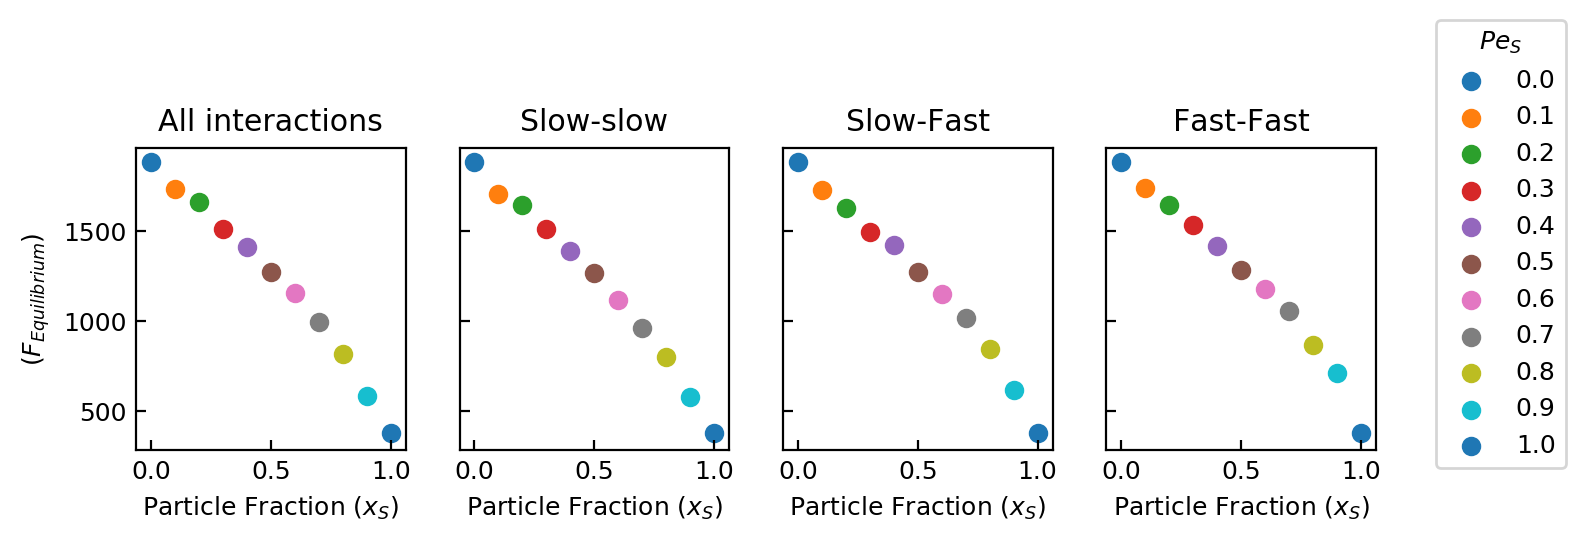

In [12]:
# Now compute the force experienced (F_LJ has to match this at sigma = 1)
def sigmaToForce(r):
    '''Take in the distance get out the equilibrium force'''
    epsilon = 1.0
    sigma = 1.0
    experiencedForce = 24.0 * epsilon * ( ((2*sigma**12)/r**13) - ((sigma**6)/r**7) )
    return experiencedForce

# Now we plot the steady state diameters
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

for i in xrange(numFiles):
    ax[0].scatter(xAs[i], sigmaToForce(SS['sigALL'][i]), label=xAs[i])
    ax[1].scatter(xAs[i], sigmaToForce(SS['sigAA'][i]), label=xAs[i])
    ax[2].scatter(xAs[i], sigmaToForce(SS['sigAB'][i]), label=xAs[i])
    ax[3].scatter(xAs[i], sigmaToForce(SS['sigBB'][i]), label=xAs[i])
# ax[0].set_ylim(0.99, 1.01)
ax[0].set_ylabel(r'$(F_{Equilibrium})$')
ax[0].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[1].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[2].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[3].set_xlabel(r'Particle Fraction $(x_{S})$')

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')
plt.legend(title=r'$Pe_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.1))
plt.show()

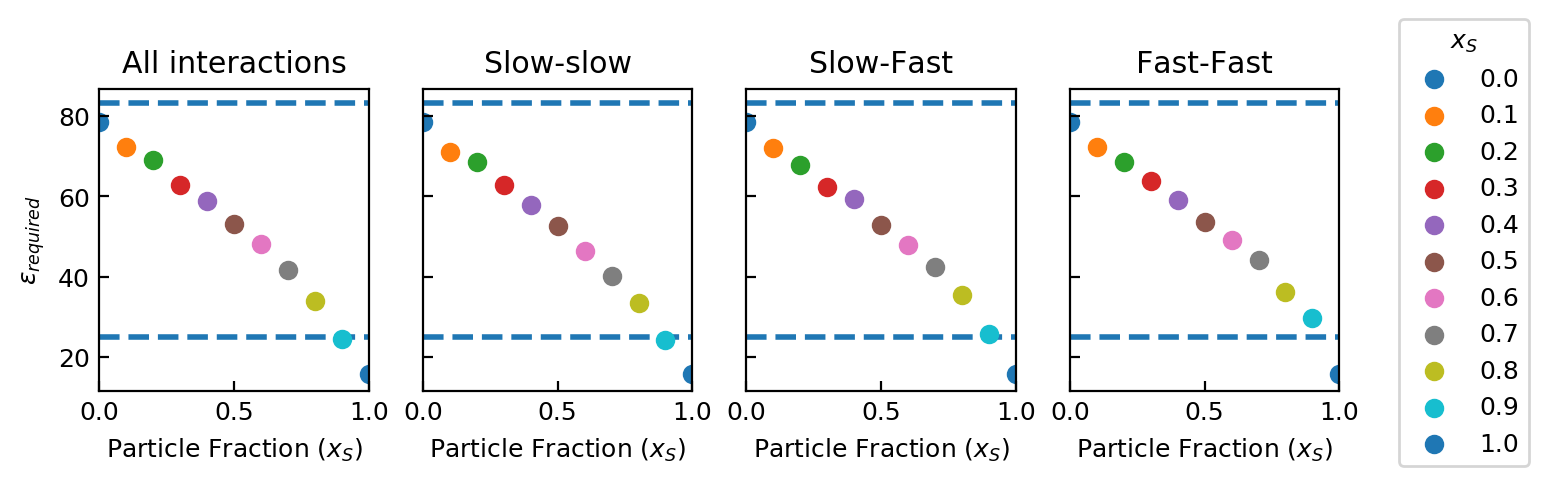

In [13]:
# Let's plot this as a function of epsilon
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

# Let's overlay the monodisperse computation of epsilon
def overlayRatio(Fa):
    sigma = 1.0
    ratio = (4 * Fa * sigma / 24.0)
    return ratio
upper = overlayRatio(500)
lower = overlayRatio(150)
for i in xrange(4):
    ax[i].axhline(y=upper, linestyle='--', lw=2, zorder=0)
    ax[i].axhline(y=lower, linestyle='--', lw=2, zorder=0)

for i in xrange(numFiles):
    ax[0].scatter(xAs[i], sigmaToForce(SS['sigALL'][i])/24.0, label=xAs[i])
    ax[1].scatter(xAs[i], sigmaToForce(SS['sigAA'][i])/24.0, label=xAs[i])
    ax[2].scatter(xAs[i], sigmaToForce(SS['sigAB'][i])/24.0, label=xAs[i])
    ax[3].scatter(xAs[i], sigmaToForce(SS['sigBB'][i])/24.0, label=xAs[i])
ax[0].set_ylabel(r'$\epsilon_{required}$')
ax[0].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[1].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[2].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[3].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[0].set_xlim(0, 1)
ax[1].set_xlim(0, 1)
ax[2].set_xlim(0, 1)
ax[3].set_xlim(0, 1)

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')

plt.legend(title=r'$x_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.29))
plt.show()

In [14]:
# Now let's fit this, linearly
def fitDataToLine(xdat, ydat):
    slope, intercept, r_value, p_value, std_err = stats.linregress(xdat, ydat)
    return slope, intercept, r_value, p_value, std_err

ALLy = []
AAy = []
ABy = []
BBy = []
for i in xrange(numFiles):
    ALLy.append(sigmaToForce(SS['sigALL'][i])/24.0)
    AAy.append(sigmaToForce(SS['sigAA'][i])/24.0)
    ABy.append(sigmaToForce(SS['sigAB'][i])/24.0)
    BBy.append(sigmaToForce(SS['sigBB'][i])/24.0)

allFit = fitDataToLine(xAs, ALLy)
AAFit = fitDataToLine(xAs, AAy)
ABFit = fitDataToLine(xAs, ABy)
BBFit = fitDataToLine(xAs, BBy)
print("Predicted coefficient in numerator: {}, intercept: {}").format(allFit[0] * 24.0, allFit[1])
print("Predicted coefficient in numerator: {}, intercept: {}").format(AAFit[0] * 24.0, AAFit[1])
print("Predicted coefficient in numerator: {}, intercept: {}").format(ABFit[0] * 24.0, ABFit[1])
print("Predicted coefficient in numerator: {}, intercept: {}").format(BBFit[0] * 24.0, BBFit[1])


Predicted coefficient in numerator: -1449.10756312, intercept: 80.9853468423
Predicted coefficient in numerator: -1448.1341126, intercept: 80.3185094339
Predicted coefficient in numerator: -1413.65083929, intercept: 80.3946532907
Predicted coefficient in numerator: -1376.27153449, intercept: 80.5938307965


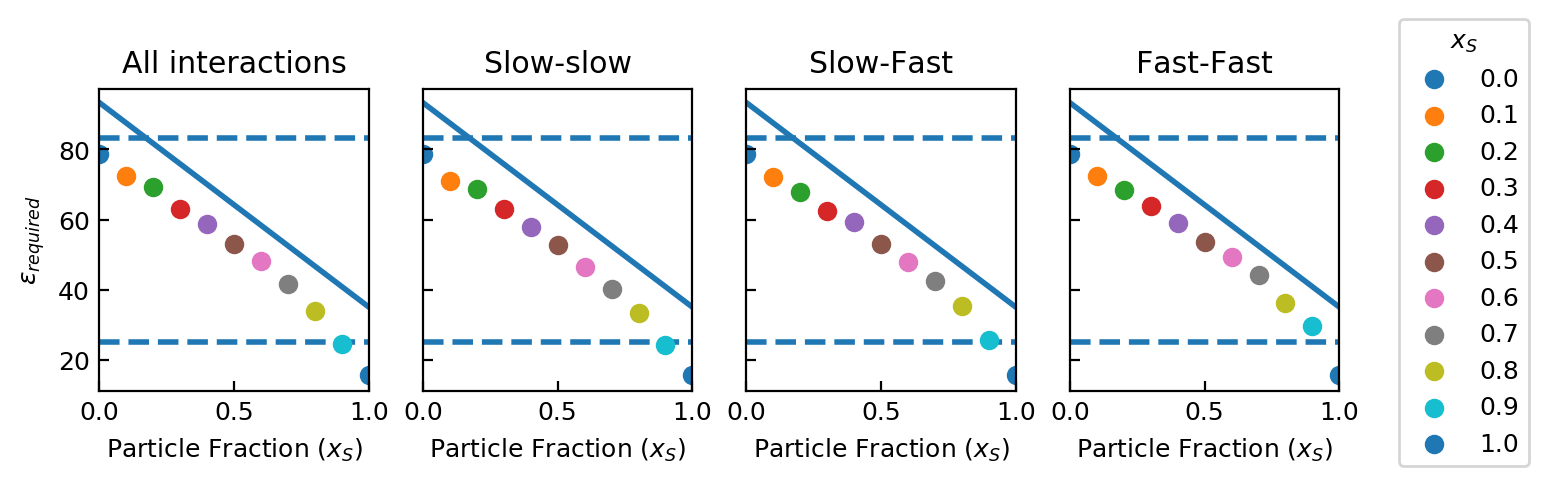

In [17]:
# Here's an idea: just weight the ratio evaluated at the extremes by the particle fraction
def epsFinder(PeS, PeF, xS):
    if xS > 1.0:
        xS /= 100.0
    xF = 1.0 - xS
    sigma = 1.0
    epsBrown = 10.0
    epsNet = (4.0 * ((xS*PeS)+(xF*PeF)) / 24.0) + epsBrown
#     monoFast = (4 * PeF * sigma) / 24.0
#     monoSlow = (4 * PeS * sigma) / 24.0
#     return monoFast * xF + monoSlow * xS
    return epsNet

xvals = np.arange(0, 1.0, 0.001)
yvals = np.zeros_like(xvals)
for i in xrange(len(xvals)):
    yvals[i] = epsFinder(150.0, 500.0, xvals[i])

# Let's evaluate this guess
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

# Let's overlay the monodisperse computation of epsilon
upper = overlayRatio(500)
lower = overlayRatio(150)
for i in xrange(4):
    ax[i].axhline(y=upper, linestyle='--', lw=2, zorder=0)
    ax[i].axhline(y=lower, linestyle='--', lw=2, zorder=0)

for i in xrange(numFiles):
    ax[0].scatter(xAs[i], sigmaToForce(SS['sigALL'][i])/24.0, label=xAs[i])
    ax[1].scatter(xAs[i], sigmaToForce(SS['sigAA'][i])/24.0, label=xAs[i])
    ax[2].scatter(xAs[i], sigmaToForce(SS['sigAB'][i])/24.0, label=xAs[i])
    ax[3].scatter(xAs[i], sigmaToForce(SS['sigBB'][i])/24.0, label=xAs[i])
ax[0].set_ylabel(r'$\epsilon_{required}$')
ax[0].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[1].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[2].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[3].set_xlabel(r'Particle Fraction $(x_{S})$')
ax[0].set_xlim(0, 1)
ax[1].set_xlim(0, 1)
ax[2].set_xlim(0, 1)
ax[3].set_xlim(0, 1)

ax[0].plot(xvals, yvals, lw=2, zorder=0)
ax[1].plot(xvals, yvals, lw=2, zorder=0)
ax[2].plot(xvals, yvals, lw=2, zorder=0)
ax[3].plot(xvals, yvals, lw=2, zorder=0)

ax[0].set_title('All interactions')
ax[1].set_title('Slow-slow')
ax[2].set_title('Slow-Fast')
ax[3].set_title('Fast-Fast')

plt.legend(title=r'$x_{S}$', loc = 4, bbox_to_anchor=(1.75, -0.29))
plt.show()
    

In [16]:
# This means that the best way to do this is with a weighted average
# epsilon_ALL = (4*PeF*sigma*xF + 4*PeS*sigma*xS) / 24.0

In [ ]:
# I just need one of the above plots
